In [5]:
import pandas as pd
import numpy as np


In [10]:
import pandas as pd

df = pd.read_csv('C:/Users/User/dev/healthcare-insurance/jupyter_notebooks/data/insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


created project folder, imported raw insurance csv file and imported pandas and numpy. Now ready to work on the cleansing of the file.

checking for null values and data type for each column


In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


check unique values for region

In [20]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

check for duplicates

In [25]:
duplicate_rows = df[duplicates]
print(f"Number of duplicate rows: {duplicates.sum()}")
print(duplicate_rows)

Number of duplicate rows: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


drop the duplicated line

In [26]:
df.drop_duplicates(subset=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], inplace=True)

In [28]:
without_duplicates = df.duplicated(subset=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']) 

In [29]:
print(f"Number of duplicate rows after drop: {without_duplicates.sum()}") 

Number of duplicate rows after drop: 0


In [30]:
clean_df = df[without_duplicates]
print(clean_df)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [31]:
import pandas as pd

# Define the BMI cut-off points and category labels
bmi_bins = [0, 18.5, 24.9, 29.9, 39.9, float('inf')]
bmi_labels = ['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity']

# Create a new column 'BMI_category' in clean_df
clean_df['BMI_category'] = pd.cut(clean_df['bmi'], bins=bmi_bins, labels=bmi_labels, right=True)

# checking that output of new column is as expected
print(clean_df[['bmi', 'BMI_category']].head())


Empty DataFrame
Columns: [bmi, BMI_category]
Index: []


In [32]:
print(clean_df.shape)
print(clean_df.head())

(0, 8)
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, BMI_category]
Index: []


reloading original dataframe as it would appear that on removing the duplicated line, something went wrong, which now prevents me adding the addtional column.



In [33]:
import pandas as pd

df = pd.read_csv('C:/Users/User/dev/healthcare-insurance/jupyter_notebooks/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


rechecking for duplicated lines

In [34]:
duplicates = df.duplicated(subset=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
print(f"Number of duplicate rows: {duplicates.sum()}")

# View the duplicates
print(df[duplicates])


Number of duplicate rows: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [35]:
clean_df = df.drop_duplicates(subset=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']).copy()

print(clean_df.shape)


(1337, 7)


reloading BMI categories

In [36]:
bmi_bins = [0, 18.5, 24.9, 29.9, 39.9, float('inf')]
bmi_labels = ['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity']

clean_df['BMI_category'] = pd.cut(clean_df['bmi'], bins=bmi_bins, labels=bmi_labels, right=True)

# Checking that the output of the new column is as expected
print(clean_df[['bmi', 'BMI_category']].head())


      bmi   BMI_category
0  27.900     overweight
1  33.770        obesity
2  33.000        obesity
3  22.705  healthy range
4  28.880     overweight


removing new column to reposition it right next to BMI column

In [38]:
if 'BMI_category' in clean_df.columns:
    clean_df.drop(columns=['BMI_category'], inplace=True)

recreating BMI_category right next to BMI

In [39]:
bmi_bins = [0, 18.5, 24.9, 29.9, 39.9, float('inf')]
bmi_labels = ['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity']

# Find the position of the 'bmi' column
bmi_index = clean_df.columns.get_loc('bmi')

# Use `insert()` to place 'BMI_category' after 'bmi'
clean_df.insert(
    loc=bmi_index + 1,
    column='BMI_category',
    value=pd.cut(clean_df['bmi'], bins=bmi_bins, labels=bmi_labels, right=True)
)

In [40]:
print(clean_df.head())

   age     sex     bmi   BMI_category  children smoker     region      charges
0   19  female  27.900     overweight         0    yes  southwest  16884.92400
1   18    male  33.770        obesity         1     no  southeast   1725.55230
2   28    male  33.000        obesity         3     no  southeast   4449.46200
3   33    male  22.705  healthy range         0     no  northwest  21984.47061
4   32    male  28.880     overweight         0     no  northwest   3866.85520


saving cleaned dataframe to new csv file

In [41]:
clean_df.to_csv('C:/Users/User/dev/healthcare-insurance/jupyter_notebooks/data/cleaned_insurance.csv', index=False)

In [42]:
import pandas as pd

df = pd.read_csv('C:/Users/User/dev/healthcare-insurance/jupyter_notebooks/data/cleaned_insurance.csv')
df

,age,sex,bmi,BMI_category,children,smoker,region,charges
0,19,female,27.900,overweight,0,yes,southwest,16884.92400
1,18,male,33.770,obesity,1,no,southeast,1725.55230
2,28,male,33.000,obesity,3,no,southeast,4449.46200
3,33,male,22.705,healthy range,0,no,northwest,21984.47061
4,32,male,28.880,overweight,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,obesity,3,no,northwest,10600.54830
1333,18,female,31.920,obesity,0,no,northeast,2205.98080
1334,18,female,36.850,obesity,0,no,southeast,1629.83350
1335,21,female,25.800,overweight,0,no,southwest,2007.94500


Data visualisation- import of libraries

In [43]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

In [45]:
import plotly.express as px

In [46]:
df = pd.read_csv('C:/Users/User/dev/healthcare-insurance/jupyter_notebooks/data/cleaned_insurance.csv')
print(clean_df.head())

   age     sex     bmi   BMI_category  children smoker     region      charges
0   19  female  27.900     overweight         0    yes  southwest  16884.92400
1   18    male  33.770        obesity         1     no  southeast   1725.55230
2   28    male  33.000        obesity         3     no  southeast   4449.46200
3   33    male  22.705  healthy range         0     no  northwest  21984.47061
4   32    male  28.880     overweight         0     no  northwest   3866.85520


Plotly – Charges by Smoking Status

In [47]:
fig = px.box(clean_df, x="smoker", y="charges", color="smoker",
             title="Insurance Charges by Smoking Status",
             labels={"charges": "Insurance Charges", "smoker": "Smoker"})
fig.show()


Plotly shows higher insurance costs for smokers than non smokers

Further analysis of costs in relation to BMI category and smoker status. Below graph shows a strong correlation between BMI category and insurance costs. BMI over 30 incurs higher insurance costs. 

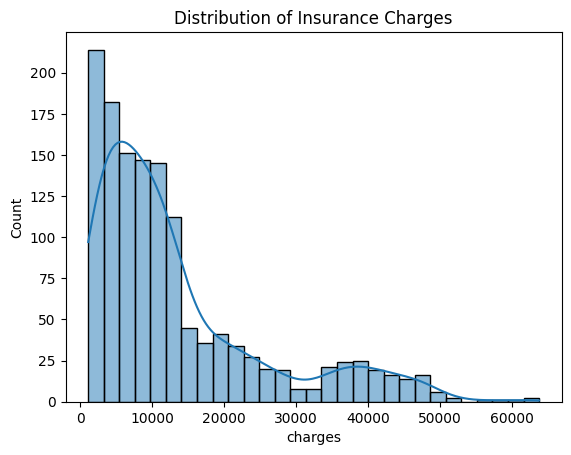

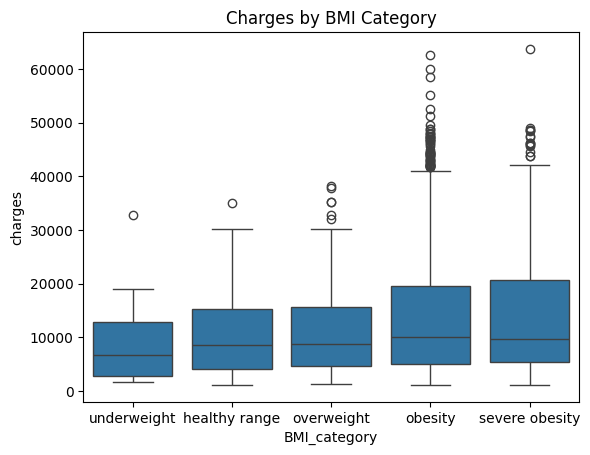

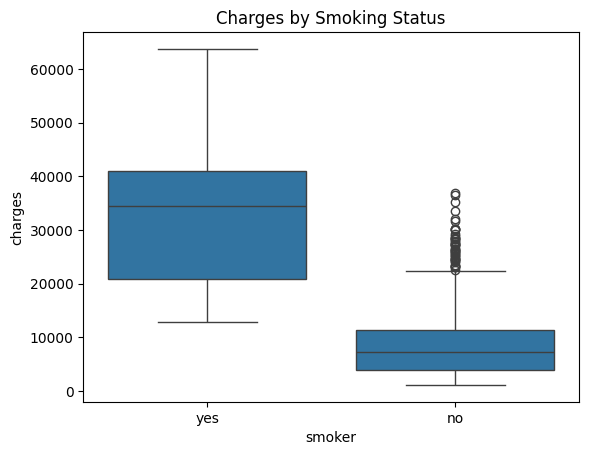

In [51]:
# Distribution of charges
sns.histplot(clean_df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()

# Charges by BMI category
sns.boxplot(x='BMI_category', y='charges', data=clean_df)
plt.title('Charges by BMI Category')
plt.show()

# Charges by smoker status
sns.boxplot(x='smoker', y='charges', data=clean_df)
plt.title('Charges by Smoking Status')
plt.show()


Descriptive Statistics. Observed=True to exclude the +65 age group since there are no +65 in the csv file. Below analysis shows that as we age, the higher the insurance cost becomes. In here, insurance cost is represented by the 'mean'.

In [54]:
clean_df['age_group'] = pd.cut(clean_df['age'], bins=[17, 25, 35, 45, 55, 65, 100],
                                labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
print(clean_df.groupby('age_group', observed=True)['charges'].mean())


age_group
18-25     9111.433685
26-35    10495.163047
36-45    13493.485247
46-55    15986.900310
56-65    18795.993816
Name: charges, dtype: float64


Average charges by gender and region

In [55]:
# By gender
print(clean_df.groupby('sex')['charges'].mean())

# By region
print(clean_df.groupby('region')['charges'].mean())


sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


Summary statistics

In [56]:
print(clean_df.describe())

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


correlation analysis

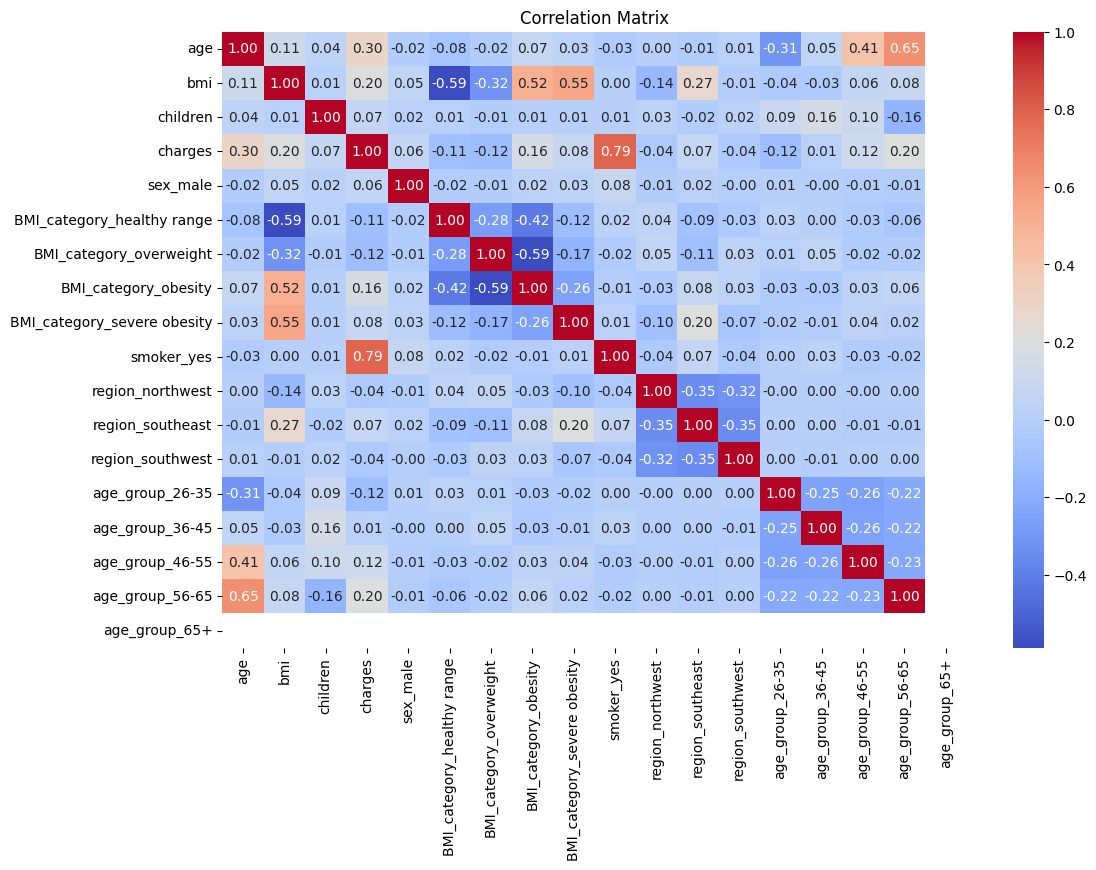

In [58]:
# Convert categorical to numeric
df_encoded = pd.get_dummies(clean_df, drop_first=True)

# Correlation matrix
corr = df_encoded.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Predictive Analysis

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

R² Score: 0.7974214112011189
RMSE: 6101.233001343478


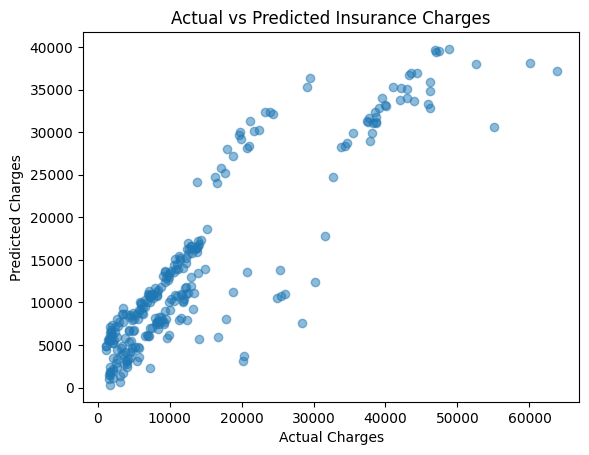

In [63]:
# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Visualisation: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()


Geographic analysis: average charges by region

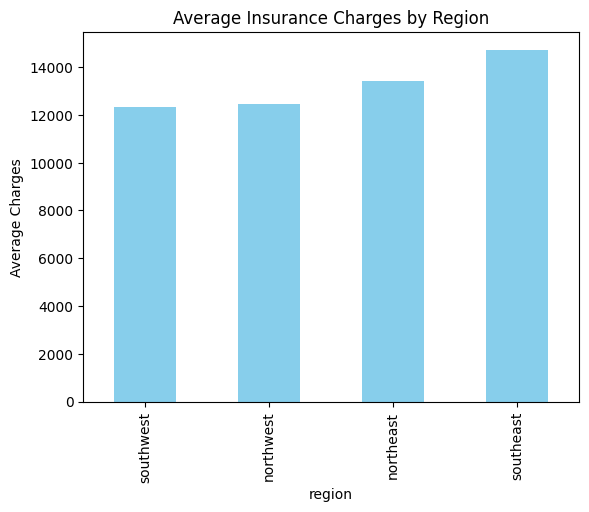

In [64]:
region_avg = clean_df.groupby('region')['charges'].mean().sort_values()

# Bar plot
region_avg.plot(kind='bar', color='skyblue')
plt.title('Average Insurance Charges by Region')
plt.ylabel('Average Charges')
plt.show()


Graph shows that there is a slight rise in costs when an individual is based in the East part of the country (either north or south).

Boxplot by region

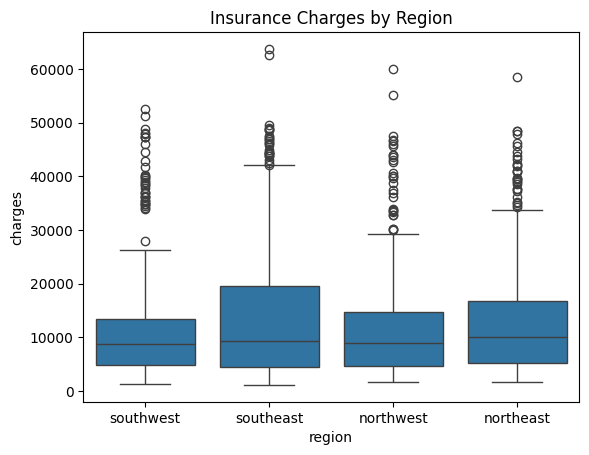

In [66]:
sns.boxplot(x='region', y='charges', data=clean_df)
plt.title('Insurance Charges by Region')
plt.show()

As per above, boxplot graph validates that the higher charges are incurred if you are based in the East part of the country (either north or south). In ascending order (cheapeast to more expensive): southwest, northwest, northeast, southeast. 